In [1]:
from src import *

/home/johnny/Data2Laws - NLI classification/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train_path = "code_review_comments/crc_train.jsonl"
test_path = "code_review_comments/crc_test.jsonl"

train_df, test_df = load_data(train_path, test_path, useful_columns=True)
test_df.groupby("group")['message'].count()

group
CodeStyle       258
Development    1056
Discussion      491
Other           167
User            235
Name: message, dtype: int64

Map: 100%|██████████| 2207/2207 [34:18<00:00,  1.07 examples/s]


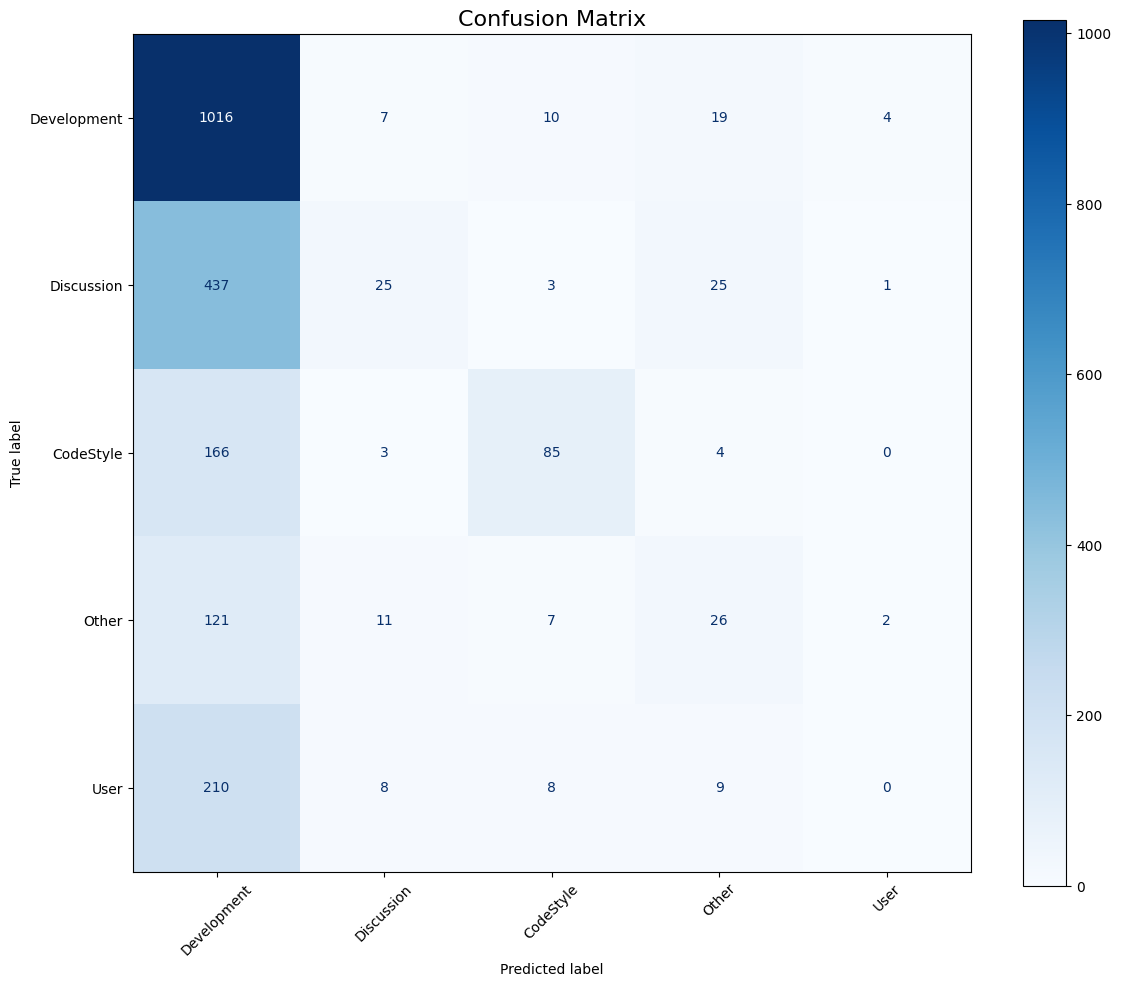

Macro scores
Precision macro: 0.4099
Recall macro: 0.2996
F1 macro: 0.2868

Class Scores
Class: Development
Precision: 0.5210
Recall: 0.9621
F1-score: 0.6760
Support: 1056
------------------------------
Class: Discussion
Precision: 0.4630
Recall: 0.0509
F1-score: 0.0917
Support: 491
------------------------------
Class: CodeStyle
Precision: 0.7522
Recall: 0.3295
F1-score: 0.4582
Support: 258
------------------------------
Class: Other
Precision: 0.3133
Recall: 0.1557
F1-score: 0.2080
Support: 167
------------------------------
Class: User
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Support: 235
------------------------------


In [3]:
model_name = 'MoritzLaurer/deberta-v3-large-zeroshot-v1.1-all-33'
batch_size = 32
label_verbalization = False
multi_prediction = False
label_name = 'group'

zero_shot_classifier = ZeroShotClassifier(model_name, batch_size, multi_prediction=multi_prediction)
final_test_df = zero_shot_classifier.classification(test_df, label_name=label_name, label_verbalization=label_verbalization)

plot_metrics(final_test_df, label_name)

Map: 100%|██████████| 2207/2207 [53:41<00:00,  1.46s/ examples] 


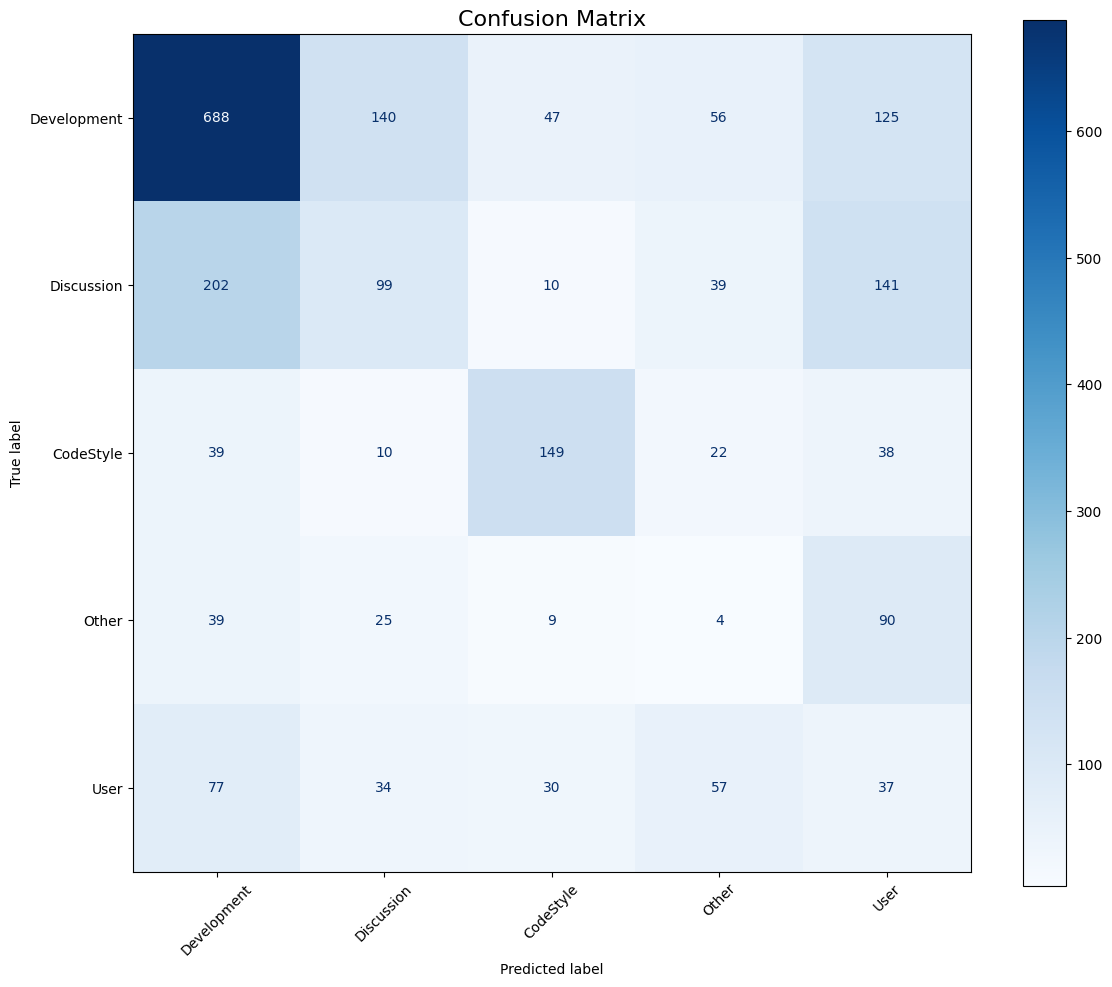

Macro scores
Precision macro: 0.3393
Recall macro: 0.3224
F1 macro: 0.3259

Class Scores
Class: Development
Precision: 0.6584
Recall: 0.6515
F1-score: 0.6549
Support: 1056
------------------------------
Class: Discussion
Precision: 0.3214
Recall: 0.2016
F1-score: 0.2478
Support: 491
------------------------------
Class: CodeStyle
Precision: 0.6082
Recall: 0.5775
F1-score: 0.5924
Support: 258
------------------------------
Class: Other
Precision: 0.0225
Recall: 0.0240
F1-score: 0.0232
Support: 167
------------------------------
Class: User
Precision: 0.0858
Recall: 0.1574
F1-score: 0.1111
Support: 235
------------------------------


In [12]:
model_name = 'MoritzLaurer/deberta-v3-large-zeroshot-v1.1-all-33'
batch_size = 32
label_verbalization = True
multi_prediction = False
label_name = 'group'

zero_shot_classifier = ZeroShotClassifier(model_name, batch_size, multi_prediction=multi_prediction)
final_test_df = zero_shot_classifier.classification(test_df, label_name=label_name, label_verbalization=label_verbalization)

plot_metrics(final_test_df, label_name)